# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/sample_data/squat.csv"; # change this
path_other = "/content/sample_data/dance.csv"; # change this
name_class = "push up" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1013.058645,431.690931,1032.309589,434.187580,988.198183,436.172174,1032.110529,435.933562,958.472999,441.290389,...,943.469245,549.845067,1076.202839,729.886264,901.822099,730.580954,1110.681175,896.821667,866.260353,897.787756
1,989.006743,274.771575,1004.377360,263.849798,978.821175,262.975572,1026.938597,272.454497,963.186377,272.324463,...,943.908141,544.352367,1073.129453,723.738276,899.234976,730.648202,1110.093388,892.303628,864.893413,896.647603
2,988.216801,273.682973,1004.168864,262.380588,976.304461,261.920908,1024.975820,269.653771,960.896705,268.596786,...,944.857335,539.491430,1072.187670,725.081206,900.921471,730.147889,1108.935616,890.474997,862.999685,896.511997
3,990.703008,274.368851,1004.782417,259.737152,975.497386,261.298522,1024.569358,272.684577,962.740645,272.317186,...,944.194987,535.728715,1074.991772,724.375738,901.186076,727.699925,1108.027101,890.103883,862.890016,897.257944
4,988.521620,270.009641,1004.406987,258.159347,975.670953,259.787388,1026.775957,271.862846,960.793900,274.139007,...,943.815313,538.241439,1074.645356,724.639537,900.832825,726.663962,1109.039765,890.228636,863.940190,897.615995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,993.888076,397.794959,1008.602671,385.170567,982.621029,384.483348,1029.208604,396.217023,966.025568,396.217622,...,951.494218,634.927401,1117.673847,746.743686,851.719085,745.081745,1115.020523,901.383500,864.954911,904.116215
151,994.557336,354.875810,1009.254893,342.694903,982.963286,342.307088,1027.714833,355.280258,965.542632,355.883243,...,950.861849,607.115919,1114.281629,740.092272,859.547314,741.546624,1114.999663,901.270068,863.940234,904.053965
152,994.240445,323.215587,1007.901265,311.013901,980.339120,309.698492,1026.827553,320.595097,962.665803,322.124631,...,949.179977,585.117644,1106.619371,743.560388,869.161506,738.244119,1114.778492,901.050646,863.782407,900.338644
153,991.946584,298.990097,1006.650534,285.289973,978.624557,284.285828,1027.153451,295.447990,961.404223,297.167355,...,945.126363,566.035871,1091.812708,734.207306,875.017537,739.084678,1113.639409,899.945293,864.981607,901.014811


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,315.824413,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,287.639108,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,308.643058,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


**Important**: Check first, the number of data each class is balance or not.

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,1013.058645,431.690931,1032.309589,434.187580,988.198183,436.172174,1032.110529,435.933562,958.472999,441.290389,...,549.845067,1076.202839,729.886264,901.822099,730.580954,1110.681175,896.821667,866.260353,897.787756,push up
1,989.006743,274.771575,1004.377360,263.849798,978.821175,262.975572,1026.938597,272.454497,963.186377,272.324463,...,544.352367,1073.129453,723.738276,899.234976,730.648202,1110.093388,892.303628,864.893413,896.647603,push up
2,988.216801,273.682973,1004.168864,262.380588,976.304461,261.920908,1024.975820,269.653771,960.896705,268.596786,...,539.491430,1072.187670,725.081206,900.921471,730.147889,1108.935616,890.474997,862.999685,896.511997,push up
3,990.703008,274.368851,1004.782417,259.737152,975.497386,261.298522,1024.569358,272.684577,962.740645,272.317186,...,535.728715,1074.991772,724.375738,901.186076,727.699925,1108.027101,890.103883,862.890016,897.257944,push up
4,988.521620,270.009641,1004.406987,258.159347,975.670953,259.787388,1026.775957,271.862846,960.793900,274.139007,...,538.241439,1074.645356,724.639537,900.832825,726.663962,1109.039765,890.228636,863.940190,897.615995,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,993.888076,397.794959,1008.602671,385.170567,982.621029,384.483348,1029.208604,396.217023,966.025568,396.217622,...,634.927401,1117.673847,746.743686,851.719085,745.081745,1115.020523,901.383500,864.954911,904.116215,push up
151,994.557336,354.875810,1009.254893,342.694903,982.963286,342.307088,1027.714833,355.280258,965.542632,355.883243,...,607.115919,1114.281629,740.092272,859.547314,741.546624,1114.999663,901.270068,863.940234,904.053965,push up
152,994.240445,323.215587,1007.901265,311.013901,980.339120,309.698492,1026.827553,320.595097,962.665803,322.124631,...,585.117644,1106.619371,743.560388,869.161506,738.244119,1114.778492,901.050646,863.782407,900.338644,push up
153,991.946584,298.990097,1006.650534,285.289973,978.624557,284.285828,1027.153451,295.447990,961.404223,297.167355,...,566.035871,1091.812708,734.207306,875.017537,739.084678,1113.639409,899.945293,864.981607,901.014811,push up


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
1,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
2,292.042772,63.019769,300.669498,51.087825,277.177682,53.582877,308.756935,51.350810,263.010624,56.533590,...,186.644795,420.202685,262.694924,312.163042,221.625098,375.893907,237.478478,308.810223,236.905919,other
3,295.243728,33.023355,308.541480,18.048312,267.461742,56.123359,322.552364,20.831887,261.056124,48.297799,...,177.824614,422.452732,262.801035,306.040913,211.568756,388.592023,228.471943,312.991360,215.892006,other
4,293.984872,39.157600,300.951799,23.933182,280.976220,24.588745,307.912168,26.610056,267.162801,29.386485,...,165.947684,423.770567,262.791324,320.843569,191.359932,391.514033,205.062929,337.064157,196.057643,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
11131,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
11132,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
11133,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,1013.058645,431.690931,1032.309589,434.187580,988.198183,436.172174,1032.110529,435.933562,958.472999,441.290389,...,549.845067,1076.202839,729.886264,901.822099,730.580954,1110.681175,896.821667,866.260353,897.787756,push up
1,989.006743,274.771575,1004.377360,263.849798,978.821175,262.975572,1026.938597,272.454497,963.186377,272.324463,...,544.352367,1073.129453,723.738276,899.234976,730.648202,1110.093388,892.303628,864.893413,896.647603,push up
2,988.216801,273.682973,1004.168864,262.380588,976.304461,261.920908,1024.975820,269.653771,960.896705,268.596786,...,539.491430,1072.187670,725.081206,900.921471,730.147889,1108.935616,890.474997,862.999685,896.511997,push up
3,990.703008,274.368851,1004.782417,259.737152,975.497386,261.298522,1024.569358,272.684577,962.740645,272.317186,...,535.728715,1074.991772,724.375738,901.186076,727.699925,1108.027101,890.103883,862.890016,897.257944,push up
4,988.521620,270.009641,1004.406987,258.159347,975.670953,259.787388,1026.775957,271.862846,960.793900,274.139007,...,538.241439,1074.645356,724.639537,900.832825,726.663962,1109.039765,890.228636,863.940190,897.615995,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927,other
11286,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458,other
11287,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070,other
11288,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1013.058645,431.690931,1032.309589,434.187580,988.198183,436.172174,1032.110529,435.933562,958.472999,441.290389,...,943.469245,549.845067,1076.202839,729.886264,901.822099,730.580954,1110.681175,896.821667,866.260353,897.787756
1,989.006743,274.771575,1004.377360,263.849798,978.821175,262.975572,1026.938597,272.454497,963.186377,272.324463,...,943.908141,544.352367,1073.129453,723.738276,899.234976,730.648202,1110.093388,892.303628,864.893413,896.647603
2,988.216801,273.682973,1004.168864,262.380588,976.304461,261.920908,1024.975820,269.653771,960.896705,268.596786,...,944.857335,539.491430,1072.187670,725.081206,900.921471,730.147889,1108.935616,890.474997,862.999685,896.511997
3,990.703008,274.368851,1004.782417,259.737152,975.497386,261.298522,1024.569358,272.684577,962.740645,272.317186,...,944.194987,535.728715,1074.991772,724.375738,901.186076,727.699925,1108.027101,890.103883,862.890016,897.257944
4,988.521620,270.009641,1004.406987,258.159347,975.670953,259.787388,1026.775957,271.862846,960.793900,274.139007,...,943.815313,538.241439,1074.645356,724.639537,900.832825,726.663962,1109.039765,890.228636,863.940190,897.615995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,254.124199,169.929333,227.074971,164.491220,236.066554,184.391280,203.611431,164.260054,216.400695,185.184304,...,335.247898,186.405259,396.910774,100.901852,419.864313,201.866667,463.853778,60.182358,490.025244,220.103927
11286,234.751625,180.895610,187.030430,180.014087,201.992169,194.103645,194.470091,168.470283,204.588079,193.943561,...,336.896472,188.572448,393.235002,103.779764,419.592673,204.241774,463.078832,60.209727,487.446306,221.685458
11287,303.499438,186.028830,281.022134,168.790254,256.516604,197.044483,221.553272,163.830887,245.622285,192.437461,...,338.418576,192.624293,394.520260,101.911798,417.863429,205.900600,461.930176,60.533004,487.177329,222.348070
11288,227.215858,174.252704,180.332176,177.461434,188.951082,189.743666,186.780988,169.347700,192.135999,190.560507,...,331.131748,186.857139,394.792229,100.070991,413.264272,200.972164,467.094994,57.409474,487.276733,220.248534


In [ ]:
y

0        push up
1        push up
2        push up
3        push up
4        push up
          ...   
11285      other
11286      other
11287      other
11288      other
11289      other
Name: class, Length: 11290, dtype: object

In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.582904,1.199141,1.612984,1.206077,1.544060,1.211589,1.612673,1.210927,1.497614,1.225807,...,1.474171,1.527347,1.681567,2.027462,1.409097,2.029392,1.735439,2.491171,1.353532,2.493855
1,1.545323,0.763254,1.569340,0.732916,1.529408,0.730488,1.604592,0.756818,1.504979,0.756457,...,1.474856,1.512090,1.676765,2.010384,1.405055,2.029578,1.734521,2.478621,1.351396,2.490688
2,1.544089,0.760230,1.569014,0.728835,1.525476,0.727558,1.601525,0.749038,1.501401,0.746102,...,1.476340,1.498587,1.675293,2.014114,1.407690,2.028189,1.732712,2.473542,1.348437,2.490311
3,1.547973,0.762136,1.569973,0.721492,1.524215,0.725829,1.600890,0.757457,1.504282,0.756437,...,1.475305,1.488135,1.679675,2.012155,1.408103,2.021389,1.731292,2.472511,1.348266,2.492383
4,1.544565,0.750027,1.569386,0.717109,1.524486,0.721632,1.604337,0.755175,1.501240,0.761497,...,1.474711,1.495115,1.679133,2.012888,1.407551,2.018511,1.732875,2.472857,1.349907,2.493378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,0.397069,0.472026,0.354805,0.456920,0.368854,0.512198,0.318143,0.456278,0.338126,0.514401,...,0.523825,0.517792,0.620173,0.280283,0.656038,0.560741,0.724772,0.167173,0.765664,0.611400
11286,0.366799,0.502488,0.292235,0.500039,0.315613,0.539177,0.303860,0.467973,0.319669,0.538732,...,0.526401,0.523812,0.614430,0.288277,0.655614,0.567338,0.723561,0.167249,0.761635,0.615793
11287,0.474218,0.516747,0.439097,0.468862,0.400807,0.547346,0.346177,0.455086,0.383785,0.534549,...,0.528779,0.535067,0.616438,0.283088,0.652912,0.571946,0.721766,0.168147,0.761215,0.617634
11288,0.355025,0.484035,0.281769,0.492948,0.295236,0.527066,0.291845,0.470410,0.300212,0.529335,...,0.517393,0.519048,0.616863,0.277975,0.645725,0.558256,0.729836,0.159471,0.761370,0.611801


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 10161
The number of test data X is: 1129
The number of train data y is : 10161
The number of test daya y is : 1129
The total dataset is : 11290


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=50)

Epoch 1/50
159/159 [==============================] - 3s 4ms/step - loss: 0.3115 - accuracy: 0.9555 - val_loss: 0.1242 - val_accuracy: 0.9885
Epoch 2/50
159/159 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9858 - val_loss: 0.0616 - val_accuracy: 0.9885
Epoch 3/50
159/159 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9860 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 4/50
159/159 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0136 - val_accuracy: 0.9885
Epoch 5/50
159/159 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9860 - val_loss: 0.0106 - val_accuracy: 0.9885
Epoch 6/50
159/159 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9871 - val_loss: 0.0088 - val_accuracy: 0.9885
Epoch 7/50
159/159 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9889 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 

## Visualization Acc & Loss

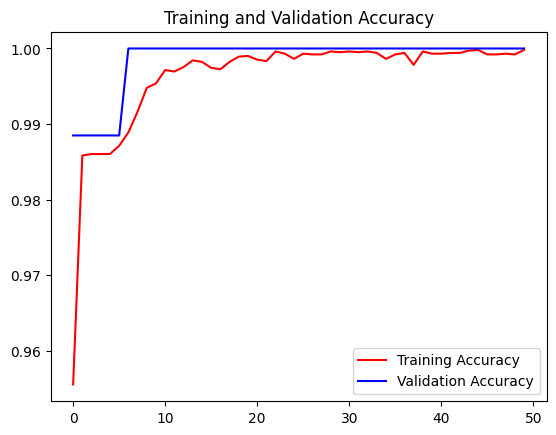

<Figure size 640x480 with 0 Axes>

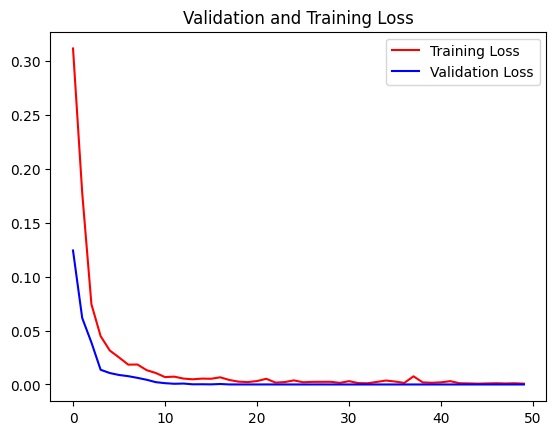

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.6315702394974494e-10
Test accuracy: 1.0


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
8455,0.54612,0.201955,0.542788,0.169799,0.528528,0.167898,0.507854,0.157066,0.47035,0.158954,...,0.432037,0.721469,0.669219,0.850314,0.61183,0.910859,0.540032,0.8195,0.487392,0.864256


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['push up', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- push up --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 99ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [ ]:
# Download this file for backup
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)


In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 34)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_3'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 2)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-06-12 07:01:06.594224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)


In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 34), dtype=tf.float32, name='input_1')})
{'dense_3': TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_3')}


Convert to TFLITE


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>